<img src="logoD.png" alt="Logo MUII" align="right">

<br><br>


# Práctica 1: Adquisición, preparación y manipulación de datos

<br>
<div style="text-align: right">
Luis de la Ossa
<br>
Master Universitario en Ingeniería Informática
<br>
Universidad de Castilla-La Mancha

</div>

---

<br>

El objetivo principal de esta primera práctica es la toma de contacto con Pandas y Matplotlib, así como la puesta en práctica de los métodos de adquisición de información a través de APIs. 
<br>

Se partirá de un conjunto de datos de referencia relativos a películas a los que, progresivamente, se añadirá información. Los nuevos nuevos datos serán obtenidos desde la web, y su incorporación al conjunto original implicará diversas acciones de transformación. Una vez obtenidos los datos, se obtendrán algunos datos de interés, y se elaborarán varias gráficas. 


In [1]:
#Esta celda de código permite reducir el tamaño de los márgenes laterales  y aprovechar mejor el tamaño de la ventana.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))




##  1. Lista de películas de IMDb  

<br>
_Internet Movie Database ( [IMDb](http://www.imdb.com) )_ es uno de los sitios de referencia en internet sobre películas y series. Entre otras cosas, almacena información sobre repartos, tramas, presupuestos, etc. Además, contiene numerosas valoraciones y revisiones de las mismas. Toda esta información es potencialmente accesible y recuperable de manera automática mediante _scraping_, pero _IMDb_ prohibe expresamente este tipo de acceso a menos que se cuente con una autorización expresa para ello. Sin embargo, publica algunos conjuntos de datos actualizados en formato `csv`. A pesar de que la información de estos archivos es reducida, en este proyecto la utilizaremos como punto de partida para la elaboración de un conjunto de datos más completo a partir de otras fuentes.

El archivo `data/movies_imdb.csv` contiene información sobre 3000 películas incluídas en _IMDb_. En concreto, para cada una de ellas se proporciona: la puntuación media de los usuarios, el número de votos,  el número de revisiones, y el enlace correspondiente dentro del sitio web. En este trabajo, estudiaremos las 200 películas mejor valoradas. En primer lugar, ha de cargarse este conjunto de datos en el `Dataframe` `df_movies`.

In [2]:
import pandas as pd
import numpy as np

#Read data from csv file
df_movies = pd.read_csv('data/movies_imdb.csv', sep=';', index_col = 'movie_title')
#df_movies = pd.read_csv('data/movies_imdb.csv', sep=';', usecols = [0,1,2,3,4])
df_movies.head(20)  

,score,num_votes,num_reviews,link
movie_title,,,,
The Shawshank Redemption,9.3,1689764,4144.0,http://www.imdb.com/title/tt0111161/
The Dark Knight,9.0,1676169,4667.0,http://www.imdb.com/title/tt0468569/
Inception,8.8,1468200,2803.0,http://www.imdb.com/title/tt1375666/
Fight Club,8.8,1347461,2968.0,http://www.imdb.com/title/tt0137523/
Pulp Fiction,8.9,1324680,2195.0,http://www.imdb.com/title/tt0110912/
Forrest Gump,8.8,1251222,1398.0,http://www.imdb.com/title/tt0109830/
The Lord of the Rings: The Fellowship of the Ring,8.8,1238746,5060.0,http://www.imdb.com/title/tt0120737/
The Matrix,8.7,1217752,3646.0,http://www.imdb.com/title/tt0133093/
The Lord of the Rings: The Return of the King,8.9,1215718,3189.0,http://www.imdb.com/title/tt0167260/


---
<font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font>  Obtener las 200 películas mejor valoradas y almacenarlas en el `DataFrame` `df_movies`.

In [3]:
df_movies = df_movies.sort_values(['score'],ascending=[False])[:200]
df_movies

,score,num_votes,num_reviews,link
movie_title,,,,
The Shawshank Redemption,9.3,1689764,4144.0,http://www.imdb.com/title/tt0111161/
The Godfather,9.2,1155770,2238.0,http://www.imdb.com/title/tt0068646/
The Godfather: Part II,9.0,790926,650.0,http://www.imdb.com/title/tt0071562/
The Dark Knight,9.0,1676169,4667.0,http://www.imdb.com/title/tt0468569/
The Lord of the Rings: The Return of the King,8.9,1215718,3189.0,http://www.imdb.com/title/tt0167260/
Pulp Fiction,8.9,1324680,2195.0,http://www.imdb.com/title/tt0110912/
"The Good, the Bad and the Ugly",8.9,503509,780.0,http://www.imdb.com/title/tt0060196/
Schindler's List,8.9,865020,1273.0,http://www.imdb.com/title/tt0108052/
Star Wars: Episode V - The Empire Strikes Back,8.8,837759,900.0,http://www.imdb.com/title/tt0080684/


<br>

### 1.1 Obtención del ID de cada película

<br>
_IMDb_ asigna un identificador único a cada película. Debido a la popularidad de la plataforma, éste es también utilizado como referencia desde otros servicios. El enlace correspondiente a cada película tiene el formato `http://www.imdb.com/title/ttXXXXXXX/`, donde `ttXXXXXXX` corresponde al identificador. 




---

<font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font>  Extraer este identificador y crear una columna, denominada `id` dentro del `Dataframe` `df_movies`. Utilizar el campo `id` como índice. Para ello, y con el fin de que no se pierda esta información, es necesario almacenar primero el índice actual, correspondiente al título de la película, en una nueva columna denominada `title`.

In [4]:
# Obtiene el identificador
#x[26] -> 't'
#x[27] -> 't
#...
#x[35] -> 'X' (last digit)
title = np.copy(df_movies.index.values)
movie_id = list(map(lambda x: x[26:35], df_movies['link']))
df_movies['id'] = movie_id

df_movies['title'] = title
# Reindexa
df_movies.set_index('id', inplace=True)

# Organiza las columnas
df_movies = df_movies[['title', 'score', 'num_votes', 'num_reviews', 'link']]
df_movies
# Muestra el resultado
#df_movies.head()

,title,score,num_votes,num_reviews,link
id,,,,,
tt0111161,The Shawshank Redemption,9.3,1689764,4144.0,http://www.imdb.com/title/tt0111161/
tt0068646,The Godfather,9.2,1155770,2238.0,http://www.imdb.com/title/tt0068646/
tt0071562,The Godfather: Part II,9.0,790926,650.0,http://www.imdb.com/title/tt0071562/
tt0468569,The Dark Knight,9.0,1676169,4667.0,http://www.imdb.com/title/tt0468569/
tt0167260,The Lord of the Rings: The Return of the King,8.9,1215718,3189.0,http://www.imdb.com/title/tt0167260/
tt0110912,Pulp Fiction,8.9,1324680,2195.0,http://www.imdb.com/title/tt0110912/
tt0060196,"The Good, the Bad and the Ugly",8.9,503509,780.0,http://www.imdb.com/title/tt0060196/
tt0108052,Schindler's List,8.9,865020,1273.0,http://www.imdb.com/title/tt0108052/
tt0080684,Star Wars: Episode V - The Empire Strikes Back,8.8,837759,900.0,http://www.imdb.com/title/tt0080684/


<br>

##  2. The Movie Database (TMDb)  

<br>
_The Movie Database ([TMDB](https://www.themoviedb.org))_ se planteó como una alternativa a _IMDb_. A día de hoy, su uso como medio de recogida de críticas y valoraciones es prácticamente nulo. Sin embargo, este sitio contiene información completa y actualizada sobre películas, y proporciona una API REST muy completa. En esta práctica utilizaremos la API de _TMDb_ para construir un conjunto de datos a partir del inicial. 

La API de TMDb requiere auntentificación por lo que para trabajar con ella es necesario, en primer lugar, disponer de un usuario. Una vez hecho el registro, es necesario solicitar una clave para el uso de la API. Las instrucciones detalladas están en esta página ([enlace](https://developers.themoviedb.org/3/getting-started/introduction)). Este proceso es sencillo, y básicamente consiste en 3 pasos:

1. Entrar en la configuración de la cuenta personal.
2. Entrar en el menú de la API.
3. Crear la API. 

Posteriormente es posible acceder, dentro de la configuración de la cuenta, a la sección correspondiente a la API. En ella se encuentran varios tokens de acceso. En este proyecto necesitamos el primero de ellos, etiquetado como _Clave de la API (v3 auth)_. Copiar este token y asignarlo a la variable `token`.


In [5]:
token = "5c5fa00e8026f99eaa78b13f9829aec3" # COMPLETAR
#https://api.themoviedb.org/3/movie/550?api_key=5c5fa00e8026f99eaa78b13f9829aec3

La API de _TMDb_ es accesible a través de `https://api.themoviedb.org/3`. En la documentación ([enlace](https://developers.themoviedb.org/3/getting-started/introduction)) pueden consultarse todos los métodos de acceso. Además, desde este sitio es posible probar los métodos, y generar las llamadas en diversos lenguajes. En el caso de Python se generan dos alternativas. La primera utiliza la librería `http.client`, mientras que la segunda utiliza `requests`.


###  2.1. Obtención de información sobre cada película.

<br>
El método `GET /movie/{movie_id}` permite obtener información sobre una película. El campo `movie_id` corresponde al identificador de la película, que puede ser el interno en TMDb o el identificador en IMDb (que es del que disponemos). Uno de los parámetros que toma  es `languaje`, que en este proyecto se fijará a `en_US`. 

In [6]:
import requests
import json

languaje = 'en_US'  # 'es_ES'
params = {'api_key':token, 'languaje':languaje}

---

<font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font>  Obtener y mostrar la información relativa a la primera película de la base de datos.

In [7]:
movie_id = df_movies.iloc[0].name
response = requests.get('https://api.themoviedb.org/3/movie/' + movie_id, params = params)
respuesta = json.dumps(response.json(), indent=4)
print(respuesta)

{
    "adult": false,
    "backdrop_path": "/xBKGJQsAIeweesB79KC89FpBrVr.jpg",
    "belongs_to_collection": null,
    "budget": 25000000,
    "genres": [
        {
            "id": 18,
            "name": "Drama"
        },
        {
            "id": 80,
            "name": "Crime"
        }
    ],
    "homepage": null,
    "id": 278,
    "imdb_id": "tt0111161",
    "original_language": "en",
    "original_title": "The Shawshank Redemption",
    "overview": "Framed in the 1940s for the double murder of his wife and her lover, upstanding banker Andy Dufresne begins a new life at the Shawshank prison, where he puts his accounting skills to work for an amoral warden. During his long stretch in prison, Dufresne comes to be admired by the other inmates -- including an older prisoner named Red -- for his integrity and unquenchable sense of hope.",
    "popularity": 28.284647,
    "poster_path": "/9O7gLzmreU0nGkIB6K3BsJbzvNv.jpg",
    "production_companies": [
        {
            "id": 61

---

<font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font> Obtener los datos relativos a todas las películas (200) y almacenarlos en la estructura `movie_data` (requiere un par de minutos).

In [8]:
movie_data = { }

'''
#Obtener movie_data a través de API
for i in range(min(200, len(df_movies))):
    movie_id = df_movies.iloc[i].name
    response = requests.get('https://api.themoviedb.org/3/movie/' + movie_id, params = params)
    movie_data[movie_id] = response.json()
'''
#Obtener movie_data a través de fichero
with open("200movies.json", "r") as archivo:
    movie_data = json.loads(archivo.read())

# Imprime los datos de una película cualquiera. 
print(json.dumps(movie_data['tt0110912'], indent=4))    

{
    "adult": false,
    "backdrop_path": "/9rZg1J6vMQoDVSgRyWcpJa8IAGy.jpg",
    "belongs_to_collection": null,
    "budget": 8000000,
    "genres": [
        {
            "id": 53,
            "name": "Thriller"
        },
        {
            "id": 80,
            "name": "Crime"
        }
    ],
    "homepage": "",
    "id": 680,
    "imdb_id": "tt0110912",
    "original_language": "en",
    "original_title": "Pulp Fiction",
    "overview": "A burger-loving hit man, his philosophical partner, a drug-addled gangster's moll and a washed-up boxer converge in this sprawling, comedic crime caper. Their adventures unfurl in three stories that ingeniously trip back and forth in time.",
    "popularity": 34.774796,
    "poster_path": "/dM2w364MScsjFf8pfMbaWUcWrR.jpg",
    "production_companies": [
        {
            "name": "Miramax Films",
            "id": 14
        },
        {
            "name": "A Band Apart",
            "id": 59
        },
        {
            "name": "Jers

---

<font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font>  Una vez obtenidos los datos relativos a película, y almacenados en la estructura `movie_data`, se ha de extraer e incorporar la información relevante  al `DataFrame` (`df_movies`). En concreto, se crearán columnas que contengan, para cada película, los siguientes campos (entre paréntesis se dan los tipos que han de utilizarse): 

* `budget (integer)`, que corresponde al presupuesto.
* `revenue (integer)`, que corresponde a las ganancias.
* `release_date (TimeStamp)`, que corresponde a la fecha de estreno.

In [9]:
#Transformamos movie_data en un DataFrame para facilitar su manipulacion
df_movie_data = pd.DataFrame.from_dict(movie_data, orient='index')
df_movies = df_movies.join(df_movie_data['budget'])
df_movies = df_movies.join(df_movie_data['revenue'])
df_movies = df_movies.join(df_movie_data['release_date'].map(pd.Timestamp))
df_movies

,title,score,num_votes,num_reviews,link,budget,revenue,release_date
id,,,,,,,,
tt0111161,The Shawshank Redemption,9.3,1689764,4144.0,http://www.imdb.com/title/tt0111161/,25000000,28341469,1994-09-23
tt0068646,The Godfather,9.2,1155770,2238.0,http://www.imdb.com/title/tt0068646/,6000000,245066411,1972-03-14
tt0071562,The Godfather: Part II,9.0,790926,650.0,http://www.imdb.com/title/tt0071562/,13000000,102600000,1974-12-20
tt0468569,The Dark Knight,9.0,1676169,4667.0,http://www.imdb.com/title/tt0468569/,185000000,1004558444,2008-07-16
tt0167260,The Lord of the Rings: The Return of the King,8.9,1215718,3189.0,http://www.imdb.com/title/tt0167260/,94000000,1118888979,2003-12-01
tt0110912,Pulp Fiction,8.9,1324680,2195.0,http://www.imdb.com/title/tt0110912/,8000000,213928762,1994-09-10
tt0060196,"The Good, the Bad and the Ugly",8.9,503509,780.0,http://www.imdb.com/title/tt0060196/,1200000,6000000,1966-12-23
tt0108052,Schindler's List,8.9,865020,1273.0,http://www.imdb.com/title/tt0108052/,22000000,321365567,1993-11-29
tt0080684,Star Wars: Episode V - The Empire Strikes Back,8.8,837759,900.0,http://www.imdb.com/title/tt0080684/,18000000,538400000,1980-05-20



### 2.2. Géneros

<br>
La información obtenida de TMDb contiene un campo denominado `genres` en el que se enumeran los géneros en los que se puede clasificar cada película. Para incorporar esta información al conjunto de datos original se utilizará un indicador, que consiste en crear una columna para cada genénero y, para cada película, asignarle el valor 1/0 según corresponda/no corresponda a ese género. 

---

<font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font> 
La función `GET genre/movie/list` devuelve el conjunto de géneros que son considerados en la clasificación de las películas.  Obtener el conjunto de géneros (sus nombres) y almacenarlo en una colección denominada `generos`.

In [10]:
response = requests.get('https://api.themoviedb.org/3/genre/movie/list', params = params)
generos = response.json()['genres']
print(json.dumps(generos, indent=4))

[
    {
        "id": 28,
        "name": "Action"
    },
    {
        "id": 12,
        "name": "Adventure"
    },
    {
        "id": 16,
        "name": "Animation"
    },
    {
        "id": 35,
        "name": "Comedy"
    },
    {
        "id": 80,
        "name": "Crime"
    },
    {
        "id": 99,
        "name": "Documentary"
    },
    {
        "id": 18,
        "name": "Drama"
    },
    {
        "id": 10751,
        "name": "Family"
    },
    {
        "id": 14,
        "name": "Fantasy"
    },
    {
        "id": 36,
        "name": "History"
    },
    {
        "id": 27,
        "name": "Horror"
    },
    {
        "id": 10402,
        "name": "Music"
    },
    {
        "id": 9648,
        "name": "Mystery"
    },
    {
        "id": 10749,
        "name": "Romance"
    },
    {
        "id": 878,
        "name": "Science Fiction"
    },
    {
        "id": 10770,
        "name": "TV Movie"
    },
    {
        "id": 53,
        "name": "Thriller"
    },
    {


---

<font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font> Crear una columna por cada uno de los géneros en `df_movies`. Inicializarla a cero.

In [11]:
movie_genres = []
for i_g in generos:
    movie_genres.append(i_g['name'])
    df_movies[i_g['name']] = 0
df_movies

,title,score,num_votes,num_reviews,link,budget,revenue,release_date,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
tt0111161,The Shawshank Redemption,9.3,1689764,4144.0,http://www.imdb.com/title/tt0111161/,25000000,28341469,1994-09-23,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0068646,The Godfather,9.2,1155770,2238.0,http://www.imdb.com/title/tt0068646/,6000000,245066411,1972-03-14,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0071562,The Godfather: Part II,9.0,790926,650.0,http://www.imdb.com/title/tt0071562/,13000000,102600000,1974-12-20,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0468569,The Dark Knight,9.0,1676169,4667.0,http://www.imdb.com/title/tt0468569/,185000000,1004558444,2008-07-16,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0167260,The Lord of the Rings: The Return of the King,8.9,1215718,3189.0,http://www.imdb.com/title/tt0167260/,94000000,1118888979,2003-12-01,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0110912,Pulp Fiction,8.9,1324680,2195.0,http://www.imdb.com/title/tt0110912/,8000000,213928762,1994-09-10,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0060196,"The Good, the Bad and the Ugly",8.9,503509,780.0,http://www.imdb.com/title/tt0060196/,1200000,6000000,1966-12-23,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0108052,Schindler's List,8.9,865020,1273.0,http://www.imdb.com/title/tt0108052/,22000000,321365567,1993-11-29,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0080684,Star Wars: Episode V - The Empire Strikes Back,8.8,837759,900.0,http://www.imdb.com/title/tt0080684/,18000000,538400000,1980-05-20,0,0,...,0,0,0,0,0,0,0,0,0,0


---

<font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font>  Marcar, para cada película, los géneros en los que está clasificada. 

In [12]:
for index, row in df_movie_data.iterrows():
    if index in df_movies.index:
        for genre_d in row['genres']:
            df_movies.loc[index, genre_d['name']] = 1
df_movies

,title,score,num_votes,num_reviews,link,budget,revenue,release_date,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
tt0111161,The Shawshank Redemption,9.3,1689764,4144.0,http://www.imdb.com/title/tt0111161/,25000000,28341469,1994-09-23,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0068646,The Godfather,9.2,1155770,2238.0,http://www.imdb.com/title/tt0068646/,6000000,245066411,1972-03-14,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0071562,The Godfather: Part II,9.0,790926,650.0,http://www.imdb.com/title/tt0071562/,13000000,102600000,1974-12-20,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0468569,The Dark Knight,9.0,1676169,4667.0,http://www.imdb.com/title/tt0468569/,185000000,1004558444,2008-07-16,1,0,...,0,0,0,0,0,0,0,1,0,0
tt0167260,The Lord of the Rings: The Return of the King,8.9,1215718,3189.0,http://www.imdb.com/title/tt0167260/,94000000,1118888979,2003-12-01,1,1,...,0,0,0,0,0,0,0,0,0,0
tt0110912,Pulp Fiction,8.9,1324680,2195.0,http://www.imdb.com/title/tt0110912/,8000000,213928762,1994-09-10,0,0,...,0,0,0,0,0,0,0,1,0,0
tt0060196,"The Good, the Bad and the Ugly",8.9,503509,780.0,http://www.imdb.com/title/tt0060196/,1200000,6000000,1966-12-23,0,0,...,0,0,0,0,0,0,0,0,0,1
tt0108052,Schindler's List,8.9,865020,1273.0,http://www.imdb.com/title/tt0108052/,22000000,321365567,1993-11-29,0,0,...,1,0,0,0,0,0,0,0,1,0
tt0080684,Star Wars: Episode V - The Empire Strikes Back,8.8,837759,900.0,http://www.imdb.com/title/tt0080684/,18000000,538400000,1980-05-20,1,1,...,0,0,0,0,0,1,0,0,0,0


---

###  2.3 Protagonistas 

<br>
En esta sección se recogerán los datos y almacenarán los datos relativos al reparto de actores de cada película.

---

<font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font>
La llamada `GET /movie/{movie_id}/credits` devuelve los créditos de la película con identificador `movie_id`.   Obtener los créditos para la primera película y almacenarlos en la variable `credits_0`

In [13]:
response = requests.get('https://api.themoviedb.org/3/movie/{movie_id}/credits'.format(movie_id = df_movies.head(1).index[0]), params = params)
credits_0 = response.json()
print(json.dumps(credits_0, indent=4))

{
    "id": 278,
    "cast": [
        {
            "cast_id": 3,
            "character": "Andy Dufresne",
            "credit_id": "52fe4231c3a36847f800b131",
            "gender": 2,
            "id": 504,
            "name": "Tim Robbins",
            "order": 0,
            "profile_path": "/7pirFsBQe93TSfzu404Hgcj1YWj.jpg"
        },
        {
            "cast_id": 4,
            "character": "Ellis Boyd 'Red' Redding",
            "credit_id": "52fe4231c3a36847f800b135",
            "gender": 2,
            "id": 192,
            "name": "Morgan Freeman",
            "order": 1,
            "profile_path": "/oGJQhOpT8S1M56tvSsbEBePV5O1.jpg"
        },
        {
            "cast_id": 5,
            "character": "Warden Samuel Norton",
            "credit_id": "52fe4231c3a36847f800b139",
            "gender": 2,
            "id": 4029,
            "name": "Bob Gunton",
            "order": 2,
            "profile_path": "/b3NfI0IzPYI40eIEtO9O0XQiR8j.jpg"
        },
        {
  

La estructura `json` devuelta contiene, para cada película, dos campos de interés:

* `crew`: Con el equipo técnico.
* `cast`: Con el reparto de actores. 

---

<font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font>
Mostrar los tres primeros actores del reparto de la primera película, cuyos datos están almacenados en la variable `credits_0`.

In [14]:
credits_0["cast"][:3]

[{'cast_id': 3,
  'character': 'Andy Dufresne',
  'credit_id': '52fe4231c3a36847f800b131',
  'gender': 2,
  'id': 504,
  'name': 'Tim Robbins',
  'order': 0,
  'profile_path': '/7pirFsBQe93TSfzu404Hgcj1YWj.jpg'},
 {'cast_id': 4,
  'character': "Ellis Boyd 'Red' Redding",
  'credit_id': '52fe4231c3a36847f800b135',
  'gender': 2,
  'id': 192,
  'name': 'Morgan Freeman',
  'order': 1,
  'profile_path': '/oGJQhOpT8S1M56tvSsbEBePV5O1.jpg'},
 {'cast_id': 5,
  'character': 'Warden Samuel Norton',
  'credit_id': '52fe4231c3a36847f800b139',
  'gender': 2,
  'id': 4029,
  'name': 'Bob Gunton',
  'order': 2,
  'profile_path': '/b3NfI0IzPYI40eIEtO9O0XQiR8j.jpg'}]

#### Creación de un conjunto de datos con los tres primeros actores de cada película 

---

<font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font>
Obtener registros correspondientes a los tres primeros actores para cada una de las 200 películas y almacenarlos en un `DataFrame` denominado `df_casts`.  En concreto, este nuevo conjunto de datos estará indexado según el identificador de la película, `movie_id`, y constará de tres columnas:

* `id`: id de la persona en TMDb.
* `name`: nombre de la persona.
* `gender`: género.

In [15]:
movie_credits = { }
'''
#Obtener movie_credits a través de API
for df_i in df_movies.index:
    response = requests.get('https://api.themoviedb.org/3/movie/{movie_id}/credits'.format(movie_id = df_i), params = params)
    print(response.json())
    response = response.json()
    movie_credits[df_i] = response["cast"][:3] if "cast" in response else {}
'''
#Obtener movie_credits a través de fichero
with open("200cast.json", "r") as archivo:
    movie_credits = json.loads(archivo.read())
    
movie_credits

{'tt0017136': [{'cast_id': 9,
   'character': 'Freder Fredersen',
   'credit_id': '52fe420fc3a36847f8000c83',
   'gender': 2,
   'id': 74,
   'name': 'Gustav Fröhlich',
   'order': 0,
   'profile_path': '/4BOW6x0pDkXgRt8IbNZZjRHo7bX.jpg'},
  {'cast_id': 10,
   'character': 'Maria',
   'credit_id': '52fe420fc3a36847f8000c87',
   'gender': 1,
   'id': 75,
   'name': 'Brigitte Helm',
   'order': 1,
   'profile_path': '/rfptoGixSQspXlUFOD2QFQ7Cka2.jpg'},
  {'cast_id': 11,
   'character': 'C.A. Rotwang, the inventor',
   'credit_id': '52fe420fc3a36847f8000c8b',
   'gender': 2,
   'id': 77,
   'name': 'Rudolf Klein-Rogge',
   'order': 2,
   'profile_path': '/fbP75fGfXFQlkf3Q5oHbJ4wjG1g.jpg'}],
 'tt0027977': [{'cast_id': 8,
   'character': 'A factory worker',
   'credit_id': '52fe4383c3a36847f8059ee9',
   'gender': 2,
   'id': 13848,
   'name': 'Charlie Chaplin',
   'order': 0,
   'profile_path': '/pcvSg2LqnyVFel9dPIwTRagpfur.jpg'},
  {'cast_id': 9,
   'character': 'A gamin',
   'credit_id': 

In [16]:
indices = []
data = []
for movie_id in movie_credits:
    for character in movie_credits[movie_id]:
        indices.append(movie_id)
        data += [{'id': character['id'], 'name': character['name'], 'gender': character['gender']}]
df_casts = pd.DataFrame(data, index=indices)
df_casts

,gender,id,name
tt0111161,2,504,Tim Robbins
tt0111161,2,192,Morgan Freeman
tt0111161,2,4029,Bob Gunton
tt0068646,2,3084,Marlon Brando
tt0068646,2,1158,Al Pacino
tt0068646,2,3085,James Caan
tt0071562,2,1158,Al Pacino
tt0071562,2,3087,Robert Duvall
tt0071562,1,3092,Diane Keaton
tt0468569,2,3894,Christian Bale




##  3. Obtención de información 

<br>
Llegados a este punto se dispone de dos `DataFrame`:

* `df_movies`: con datos sobre cada película.
* `df_casts`; que contienene los datos (id, nombre y género) relativos a los tres actores principales que participan en cada película.


En esta sección se trata de _obtener información a partir de estos conjuntos datos_. Para ello, es necesario manipular y llevar a cabo ciertas operaciones sobre los `DataFrame`. 

---

<font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font> ¿Quienes son los 10 actores que más aparecen?

In [17]:
df_casts.name.value_counts().head(10)
#Leonardo DiCaprio    6
#Harrison Ford        6
#Robert De Niro       5
#Clint Eastwood       5
#Tom Hanks            5
#Ethan Hawke          4
#Matt Damon           4
#Morgan Freeman       4
#Michael Caine        4
#Christian Bale       4

Harrison Ford        6
Leonardo DiCaprio    6
Tom Hanks            5
Robert De Niro       5
Clint Eastwood       5
Christian Bale       4
Ethan Hawke          4
Morgan Freeman       4
Matt Damon           4
Michael Caine        4
Name: name, dtype: int64

---

<font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font> En las 200 películas más valoradas, ¿hay más actores o actrices?

In [18]:
df_casts.join(df_movies).gender.value_counts()
#Male (2) - 421
#Female (1) - 156
#Unknown (0) - 23

2    421
1    156
0     23
Name: gender, dtype: int64

---

<font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font> ¿Quién es el actor/actriz cuyas películas tienen una puntuación media más alta?

In [19]:
#Unimos los dos dataframes #Agrupamos por nombre de actor/actress #Calculamos medias #Ordenamos por score medio
df_groups_castname = df_casts.join(df_movies).groupby('name').mean().sort_values(['score'],ascending=[False])
df_groups_castname.head(1)
#Bob Gunton - 9.3

,gender,id,score,num_votes,num_reviews,budget,revenue,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
name,,,,,,,,,,,,,,,,,,,,,
Bob Gunton,2.0,4029.0,9.3,1689764.0,4144.0,25000000.0,28341469.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---

<font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font> ¿Qué género es el que, de media, obtiene una puntuación media mayor? ¿Y número de votaciones?

In [20]:
genre_score, highest_score, genre_votes, highest_votes = "", 0, "", 0
#Iteramos cada genero de pelicula, obtenemos score y numero de votos medios y nos quedamos con los valores mas altos de cada tipo
for genre in movie_genres:
    new_score_mean = df_movies[df_movies[genre] == 1]['score'].mean()
    if(new_score_mean > highest_score):
        highest_score = new_score_mean
        genre_score = genre
    new_votes_mean = df_movies[df_movies[genre] == 1]['num_votes'].mean()
    if(new_votes_mean > highest_votes):
        highest_votes = new_votes_mean
        genre_votes = genre
print("Highest (avg) rate genre -\t {genre}\t-\t{score}".format(genre=genre_score, score=highest_score))
print("Most (avg) voted genre - \t{genre}\t-\t{vote}".format(genre=genre_votes, vote=highest_votes))    
#Highest (avg) rate genre -	 Crime	-	8.363414634146343
#Most (avg) voted genre - 	Action	-	647378.2978723404

Highest (avg) rate genre -	 Crime	-	8.363414634146343
Most (avg) voted genre - 	Action	-	647378.2978723404


---

<font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font> ¿Qué correlación hay entre el presupuesto de las películas y su valoración?

In [21]:
np.corrcoef(df_movies['budget'], df_movies['score'])
#np.correlate(df_movies['budget'], df_movies['score'])
#array([[1.       , 0.0655768],
#      [0.0655768, 1.       ]])

array([[1.       , 0.0655768],
       [0.0655768, 1.       ]])

La correlación entre el presupuesto de las películas y su valoración es **muy baja**, esto es, gastarse más dinero no garantiza el taquillazo y gastarse menos no significa que la película vaya a ser mala.

---

<font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font> Dibujar un diagrama de barras con la puntuación media obtenida por las películas correspondientes a cada género. Utilizar en el eje x los nombres de los géneros, rotados 45º. Eliminar también los bordes superior, izquierdo y derecho, y escribir la puntuación media en cada barra. 

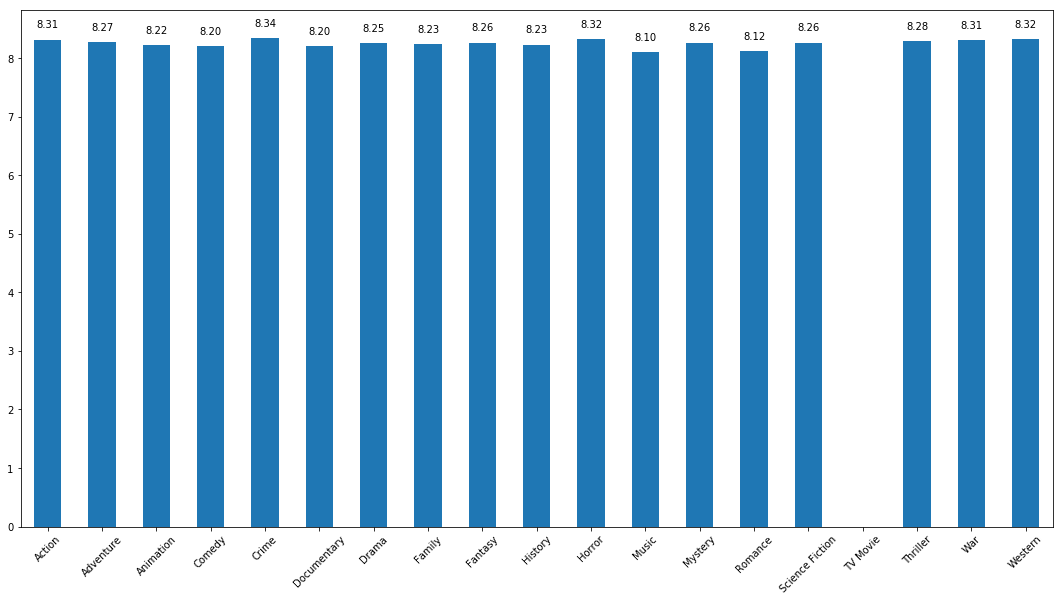

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt

#Recopilacion de valores
genre_list, highest_score = [], []
for genre in movie_genres:
    genre_list.append(genre)
    highest_score.append(df_movies[df_movies[genre] == 1]['score'].mean())

#Configuracion de eje X
x_pos = np.arange(len(genre_list))
plt.bar(x_pos, highest_score, width= 0.5)
plt.xticks(x_pos, genre_list, rotation=45)

#Configuracion de figura y adicion de texto
plt.gcf().set_size_inches(18.5, 9.5)
plt.gca().set_xlim(-0.5, x_pos[-1] + .5)
plt.gca().set_ylim(0, highest_score[-1] + 0.5)
for x, y in zip(x_pos, highest_score):
    if(not np.isnan(y)):
        plt.text(x-0.2, y + 0.2, "{0:.2f}".format(y))

plt.show()

---

<font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font> Dibujar la serie con la película mejor puntuada de cada año.

In [23]:
#Aplicamos una funcion a la columna release_date para sacar el año
df_movies['release_date'] = df_movies.release_date.apply(lambda a: a.year)

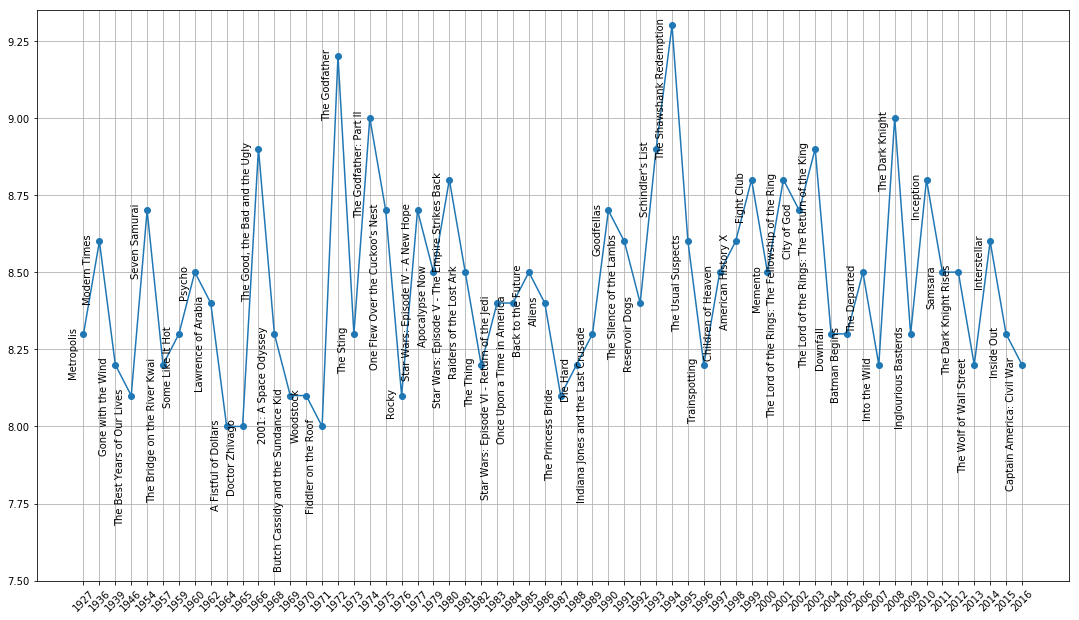

In [24]:
df_best_movie_year = df_movies.groupby('release_date')
year_x, movie_score, movie_title = [], [], []
for year, movies in df_best_movie_year:
    year_x.append(year)
    movie_title.append(movies[movies.score == movies.score.max()]['title'][0])
    movie_score.append(movies[movies.score == movies.score.max()]['score'][0])

x_pos = np.arange(len(year_x))
plt.xticks(x_pos, year_x, rotation=45)
plt.gca().set_ylim(min(movie_score)- .5, max(movie_score) + .05)

plt.plot(x_pos, movie_score, marker="o")
list(map(lambda a: plt.text(a[0]-1, a[1], a[2], rotation=90), zip(x_pos, movie_score, movie_title)))
plt.gcf().set_size_inches(18.5, 10.5)
plt.grid()
plt.show()


---

<font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> </font> __Ejercicio libre__: Elaborar una gráfica distinta a las anteriores. 

Como parte de este ejercicio, mostraremos las películas más y menos rentables de cada año desde **1980** hasta hoy. Mediremos la **rentabilidad** como el cociente entre los beneficios obtenidos por la película y el presupuesto de la misma. Para evitar _outliers_ que alteren la gráfica, representaremos solo aquellas películas cuyo factor de rentabilidad sea **menor o igual que 40**. Las películas más rentables de cada año se dibujarán en **azul**, y las menos rentables en **rojo**. Si en un año solo existen datos de una película, se representará en rojo.

In [25]:
#Obtenemos el factor de lo que ha ganado una pelicula respecto a lo que costo y lo añadimos en una columna
df_movies['profitability'] = df_movies['revenue']/df_movies['budget']
#Eliminamos peliculas de rentabilidad muy alta (para que se mas facil estudiar el grafico)
df_movies = df_movies[df_movies.profitability <= 40]
#Ordenamos por rentabilidad de mayor a menor
df_movies.sort_values(['profitability'],ascending=[False], inplace=True)
df_movies

C:\Users\garci\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,title,score,num_votes,num_reviews,link,budget,revenue,release_date,Action,Adventure,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,profitability
id,,,,,,,,,,,,,,,,,,,,,
tt0054215,Psycho,8.5,422432,1040.0,http://www.imdb.com/title/tt0054215/,806948,32000000,1960,0,0,...,1,0,0,0,0,0,1,0,0,39.655591
tt0073486,One Flew Over the Cuckoo's Nest,8.7,680041,760.0,http://www.imdb.com/title/tt0073486/,3000000,108981275,1975,0,0,...,0,0,0,0,0,0,0,0,0,36.327092
tt0405094,The Lives of Others,8.5,259379,407.0,http://www.imdb.com/title/tt0405094/,2000000,70000000,2006,0,0,...,0,0,0,0,0,0,1,0,0,35.000000
tt0059742,The Sound of Music,8.0,148172,406.0,http://www.imdb.com/title/tt0059742/,8200000,286214286,1965,0,0,...,0,1,0,1,0,0,0,0,0,34.904181
tt0072431,Young Frankenstein,8.0,112671,315.0,http://www.imdb.com/title/tt0072431/,2800000,86273333,1974,0,0,...,0,0,0,0,1,0,0,0,0,30.811905
tt0080684,Star Wars: Episode V - The Empire Strikes Back,8.8,837759,900.0,http://www.imdb.com/title/tt0080684/,18000000,538400000,1980,1,1,...,0,0,0,0,1,0,0,0,0,29.911111
tt0070735,The Sting,8.3,175607,252.0,http://www.imdb.com/title/tt0070735/,5500000,159616327,1973,0,0,...,0,0,0,0,0,0,0,0,0,29.021150
tt1504320,The King's Speech,8.0,503631,636.0,http://www.imdb.com/title/tt1504320/,15000000,414211549,2010,0,0,...,0,0,0,0,0,0,0,0,0,27.614103
tt0110912,Pulp Fiction,8.9,1324680,2195.0,http://www.imdb.com/title/tt0110912/,8000000,213928762,1994,0,0,...,0,0,0,0,0,0,1,0,0,26.741095


<IPython.core.display.Javascript object>


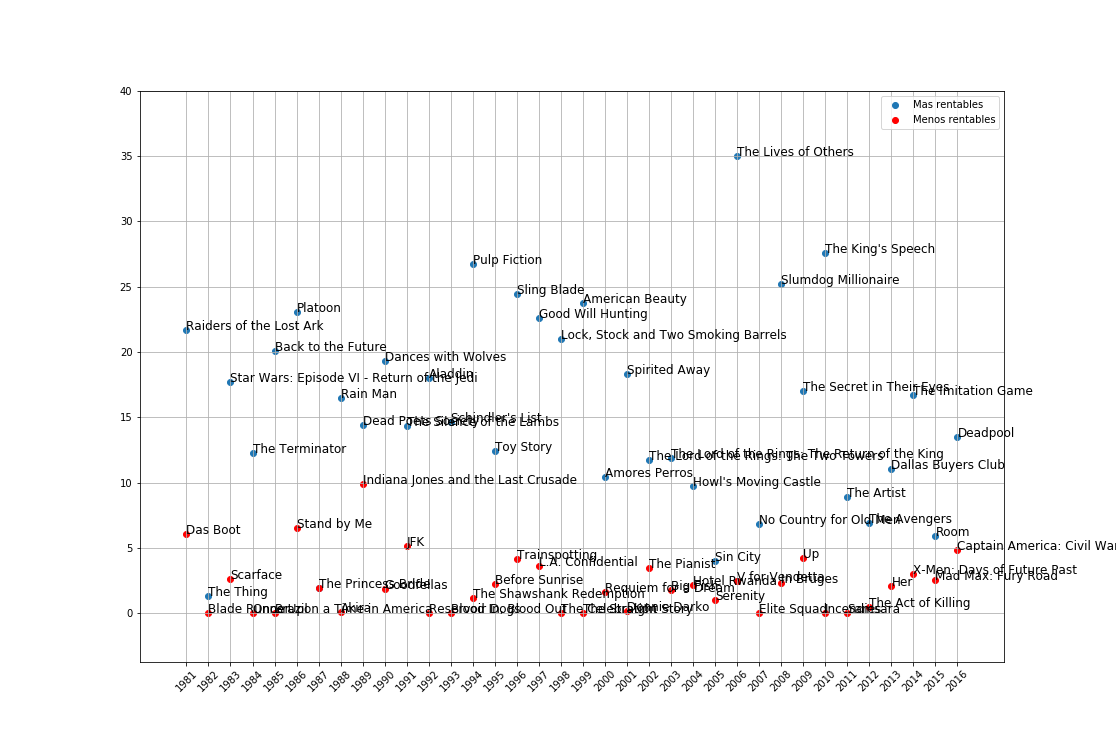

In [26]:
%matplotlib notebook
%matplotlib notebook
#Descartamos periodo anterior a 1980 debido a bajo numero de peliculas que se hacían entonces
df_movies_year = df_movies[df_movies.release_date > 1980].groupby('release_date')
#year_x - xticks, movie_profitability - rentabilidad alta de un año, movie_profitability_l - rentabilidad baja de un año
#movie_title - titulos de peliculas de alta rentabilidad, movie_title_l - titulos de peliculas de baja rentabilidad
year_x, movie_profitability, movie_profitability_l, movie_title, movie_title_l = [], [], [], [], []
for year, movies in df_movies_year:
    year_x.append(year)
    movie_title.append(movies['title'][0])
    movie_profitability.append(movies['profitability'][0])
    if(movies['title'][-1] == movies['title'][0]):
        movie_title_l.append(" ")
    else:
        movie_title_l.append(movies['title'][-1])
    movie_profitability_l.append(movies['profitability'][-1])
    
x_pos = np.arange(len(year_x))
plt.scatter(x_pos, movie_profitability, label='Mas rentables')
plt.scatter(x_pos, movie_profitability_l, label='Menos rentables', c='r')
plt.xticks(x_pos, year_x, rotation=45)
plt.gca().set_ylim(min(movie_profitability)- 5, max(movie_profitability) + 5)

list(map(lambda a: plt.text(a[0], a[1], a[2], rotation=0, fontsize=12), zip(x_pos, movie_profitability, movie_title)))
list(map(lambda a: plt.text(a[0], a[1], a[2], rotation=0, fontsize=12), zip(x_pos, movie_profitability_l, movie_title_l)))

plt.gcf().set_size_inches(15.5, 10.5)
plt.legend()
plt.grid()
plt.show()

<div style="text-align: right"> <font size=5> [<i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#990003">](#indice)</i></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#990003"></i> </font></div>